In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

In [62]:
df = pd.read_csv('HR_dummies.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,2,False,False,False,True,False,False,False,False,False
11987,0.74,0.95,5,266,10,0,0,1,2,False,False,False,True,False,False,False,False,False
11988,0.85,0.54,3,185,10,0,0,1,2,False,False,False,True,False,False,False,False,False
11989,0.33,0.65,3,172,10,0,0,1,2,False,False,False,False,True,False,False,False,False


In [63]:
y = df['left']
X = df.drop('left', axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
model_balanced = LogisticRegression(max_iter=2000, class_weight='balanced')
model_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2001
           1       0.42      0.84      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399

Matriz de confusión:
[[1540  461]
 [  62  336]]


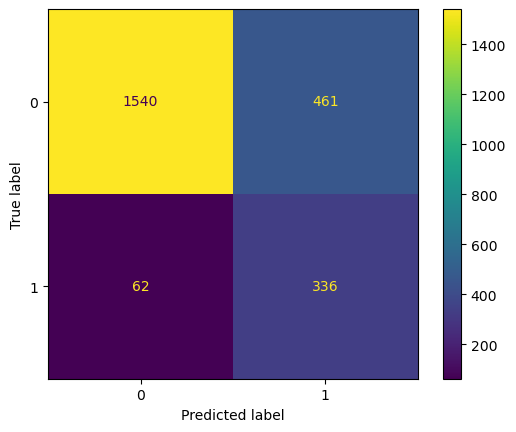

In [66]:
y_pred_logistic = model_balanced.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_logistic))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_logistic))
roc_auc_score(y_test, y_pred_logistic)

cm2 = metrics.confusion_matrix(y_test, y_pred_logistic)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm2, display_labels=model_balanced.classes_)
disp.plot()

In [67]:
import pickle

with open('train_test_split.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

In [ ]:
pd.Series(y_pred_logistic).to_csv("y_pred_logistic.csv", index=False)